In [1]:
import json, pycm, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [14]:
cm_1 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_european_2023-08-29T13:03:30.398606.json', 'r'))["confusion_matrix"])
cm_2 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_wordnet_european_2023-08-29T13:46:49.120575.json', 'r'))["confusion_matrix"])
cm_3 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_dictionary_dot_com_adj_2_european_2023-08-29T13:59:33.637129.json', 'r'))["confusion_matrix"])
cm_4 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-3.5-turbo_oed_european_2023-08-29T15:42:36.417920.json', 'r'))["confusion_matrix"])
cm_5 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/text-curie-001_oed_european_2023-08-29T15:44:32.491068.json', 'r'))["confusion_matrix"])
cm_6 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_european_2023-08-29T13:03:30.398606.json', 'r'))["confusion_matrix"])
cm_7 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_european_2023-08-29T16:33:33.067956.json', 'r'))["confusion_matrix"])


In [9]:
print(pycm.Compare({"OED": cm_1, "WordNet": cm_2, "Dictionary.com": cm_3}))

Best : None

Rank   Name              Class-Score       Overall-Score
1      Dictionary.com    0.34583           0.5381
1      WordNet           0.34583           0.5381
1      OED               0.34583           0.5381



/Users/bradleyallen/Documents/GitHub/conceptual-engineering-using-llms/lib/python3.11/site-packages/pycm/pycm_compare.py:86: RuntimeWarning: Confusion matrices are too close and the best one can not be recognized.
  warn(COMPARE_RESULT_WARNING, RuntimeWarning)


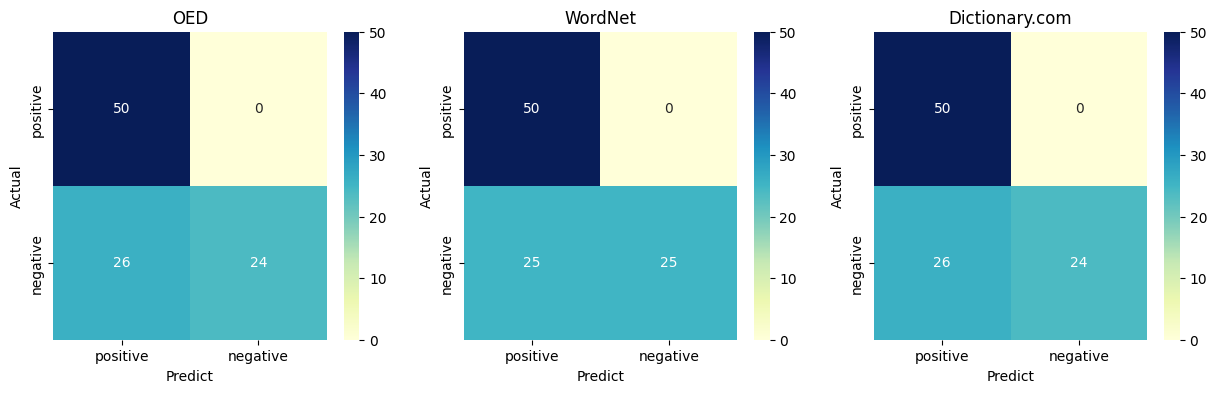

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, cm) in zip(axes, [ ("OED", cm_1), ("WordNet", cm_2), ("Dictionary.com", cm_3) ]):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name)
    ax.set(xlabel='Predict', ylabel='Actual')
plt.show()

In [5]:
pd.DataFrame({"Krippendorff's Alpha": [ cm_1.SOA9, cm_2.SOA9, cm_3.SOA9 ]}, index=[ "OED", "Definition 2", "Definition 3"])

,Krippendorff's Alpha
OED,Low
Definition 2,Low
Definition 3,Low


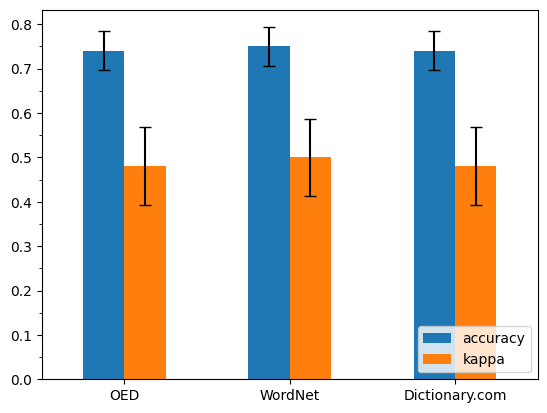

In [6]:
accuracy = [ cm.overall_stat["Overall ACC"] for cm in [ cm_1, cm_2, cm_3 ] ]
accuracy_se = [ cm.CI("Overall ACC")[0] for cm in [ cm_1, cm_2, cm_3 ] ]
kappa = [ cm.Kappa for cm in [ cm_1, cm_2, cm_3 ] ]
kappa_se = [ cm.CI("Kappa")[0] for cm in [ cm_1, cm_2, cm_3 ] ]
index = [ "OED", "WordNet", "Dictionary.com"]
df = pd.DataFrame({'accuracy': accuracy, 'kappa': kappa}, index=index)
df_se = pd.DataFrame({'accuracy': accuracy_se, 'kappa': kappa_se}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(yerr=df_se, ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()

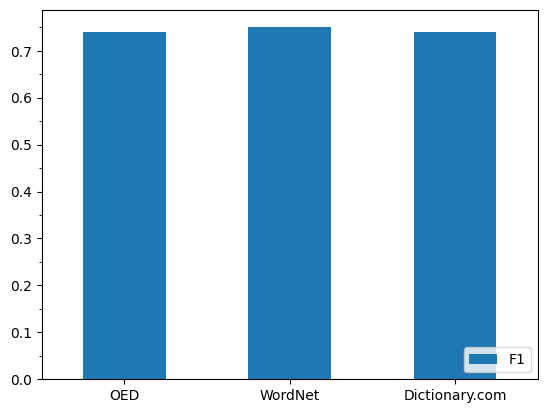

In [7]:
f1_micro = [ cm.F1_Micro for cm in [ cm_1, cm_2, cm_3 ] ]
index = [ "OED", "WordNet", "Dictionary.com"]
df = pd.DataFrame({'F1': f1_micro}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()

In [13]:
print(pycm.Compare({"OED/gpt-4": cm_1, "OED/gpt-3.5-turbo": cm_4})) #, "OED/text-curie-001": cm_5}))

Best : OED/gpt-3.5-turbo

Rank  Name                 Class-Score       Overall-Score
1     OED/gpt-3.5-turbo    0.36667           0.5381
2     OED/gpt-4            0.34583           0.5381



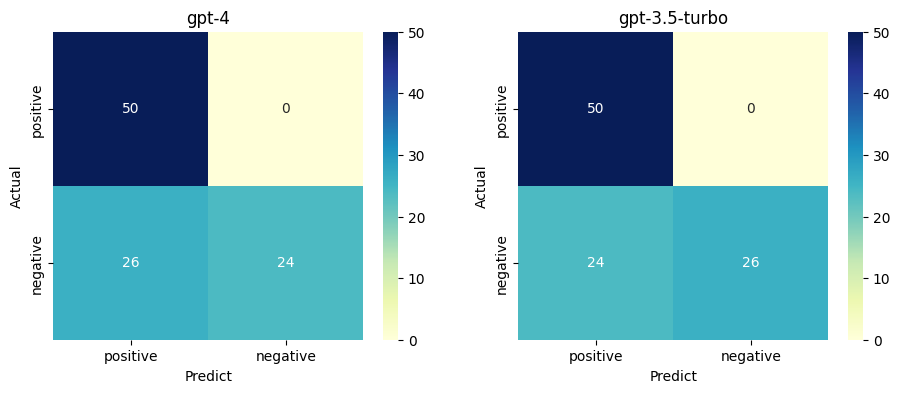

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
for ax, (name, cm) in zip(axes, [ ("gpt-4", cm_1), ("gpt-3.5-turbo", cm_4) ]):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name)
    ax.set(xlabel='Predict', ylabel='Actual')
plt.show()

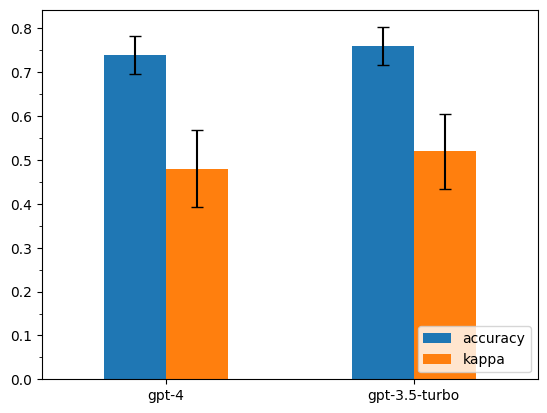

In [18]:
accuracy = [ cm.overall_stat["Overall ACC"] for cm in [ cm_1, cm_4 ] ]
accuracy_se = [ cm.CI("Overall ACC")[0] for cm in [ cm_1, cm_4 ] ]
kappa = [ cm.Kappa for cm in [ cm_1, cm_4 ] ]
kappa_se = [ cm.CI("Kappa")[0] for cm in [ cm_1, cm_4 ] ]
index = [ "gpt-4", "gpt-3.5-turbo"]
df = pd.DataFrame({'accuracy': accuracy, 'kappa': kappa}, index=index)
df_se = pd.DataFrame({'accuracy': accuracy_se, 'kappa': kappa_se}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(yerr=df_se, ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()

In [15]:
print(pycm.Compare({"OED/description": cm_1, "OED/no-description": cm_7}))

Best : OED/description

Rank  Name                  Class-Score       Overall-Score
1     OED/description       0.34583           0.5381
2     OED/no-description    0.2375            0.4381



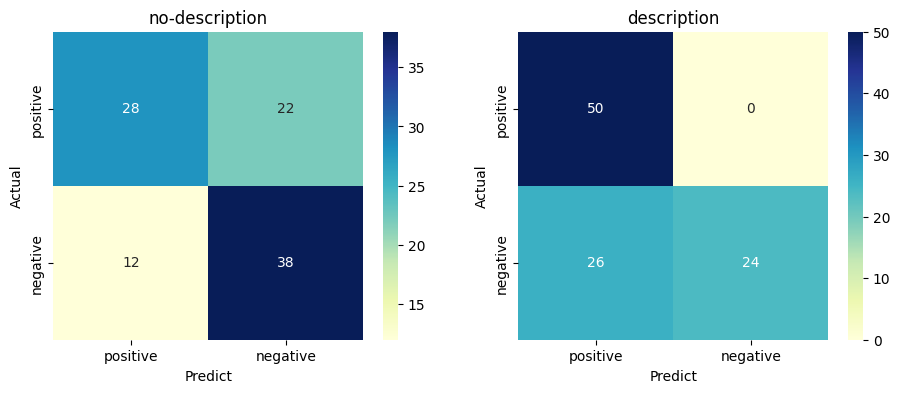

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4))
for ax, (name, cm) in zip(axes, [ ("no-description", cm_7), ("description", cm_1) ]):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name)
    ax.set(xlabel='Predict', ylabel='Actual')
plt.show()

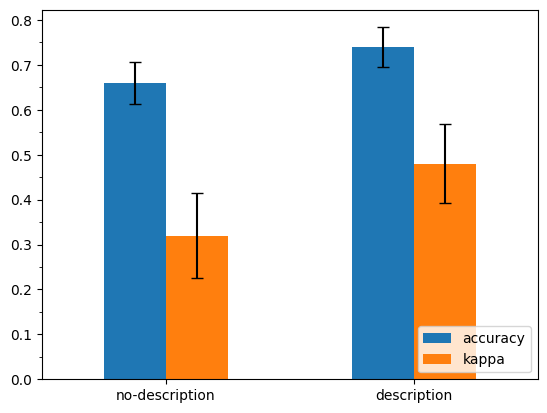

In [19]:
accuracy = [ cm.overall_stat["Overall ACC"] for cm in [ cm_7, cm_1 ] ]
accuracy_se = [ cm.CI("Overall ACC")[0] for cm in [ cm_7, cm_1 ] ]
kappa = [ cm.Kappa for cm in [ cm_7, cm_1 ] ]
kappa_se = [ cm.CI("Kappa")[0] for cm in [ cm_7, cm_1 ] ]
index = [ "no-description", "description"]
df = pd.DataFrame({'accuracy': accuracy, 'kappa': kappa}, index=index)
df_se = pd.DataFrame({'accuracy': accuracy_se, 'kappa': kappa_se}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(yerr=df_se, ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()